# Roomba Simulator

## Introduction

The goal of this project is to simulate [iRobot](https://www.irobot.com/) vacuum cleaners using robotic agents with different strategies, compare their performance (time/efficiency) and produce interesting and trustworthy analyses and visualizations.

In this notebook we demonstrate in details: 
* Designing simulations/experiments
* Generating data 
* Performing Data Analysis. 

> Further implementation details and documentation can be found in this [repository](https://github.com/osamayasserr/roomba-simulator).

## Data

All the data used in visualizations is generated from within the project. By the help of fully customizable experiments we are able to generate our own set of clean and tidy data, ready for analysis and drawing conclusions.

---

## Simulation

Here we wrote **runSimulation** to perform a set of experiments, in which we model a rectangular room containing robotic agent/s, whose goal is to clean up the room.
This function takes in multiple arguments which makes customizing experiments so simple. It returns the average time taken to clean a fraction of the room.

> Increasing the number of trials/experiments will produce consistent results

In [2]:
# Import all robotic agents and the simulation function
from app import RectangularRoom, StandardRobot, RandomWalkRobot, LeastDistanceRobot

def runSimulation(num_robots, speed, width, height, min_coverage, num_trials,
                  robot_type):
    """
    Runs NUM_TRIALS trials of the simulation and returns the mean number of
    time-steps needed to clean the fraction MIN_COVERAGE of the room.
    The simulation is run with NUM_ROBOTS robots of type ROBOT_TYPE, each with
    speed SPEED, in a room of dimensions WIDTH x HEIGHT.
    
    num_robots: an int (num_robots > 0)
    speed: a float (speed > 0)
    width: an int (width > 0)
    height: an int (height > 0)
    min_coverage: a float (0 <= min_coverage <= 1.0)
    num_trials: an int (num_trials > 0)
    robot_type: class of robot to be instantiated (e.g. StandardRobot or
                RandomWalkRobot)
    """
    # Set trial results
    trials = []

    for i in range(num_trials):

        # Set room & robots list
        robots = []
        room = RectangularRoom(width, height)
        room_size = room.getNumTiles()

        # Initialize robots
        for j in range(num_robots):

            # Create instance & add to list
            robot = robot_type(room, speed)
            robots.append(robot)

        # Do until room is clean
        clock_tick = 0
        while room.getNumCleanedTiles() < (min_coverage * room_size):

            # Move each robot
            for robot in robots:
                robot.updatePositionAndClean()  
            clock_tick += 1

        # Add trial result
        trials.append(clock_tick)

    # Return average
    return sum(trials) / len(trials)

### Runnig an experiment

Let's carry out a simple experiment to showcase the performance of a single robotic agent of each type, trying to clean 100% of  a 5x5 dirty room. Notice that we run each experiment 5000 times to get consistent results.

In [3]:
print("Random Robot takes about", int(runSimulation(1, 1, 5, 5, 1, 5000, RandomWalkRobot)), "time steps.")
print("Standard Robot takes about", int(runSimulation(1, 1, 5, 5, 1, 5000, StandardRobot)), "time steps.")
print("Smart Robot takes about", int(runSimulation(1, 1, 5, 5, 1, 5000, LeastDistanceRobot)), "time steps.")

Random Robot takes about 175 time steps.
Standard Robot takes about 155 time steps.
Smart Robot takes about 30 time steps.


Having seen the results, we can see a noticable variation in the performance of different agents.

The algorithm that the **LeastDistanceRobot** uses must be very smart! But does it scale well?

What would happen if we put multiple robots in the same room? What would it be like if we use an enormous 20x20 room? Or a room with an aspect ratio of 100:1?

To test the efficiency of our algorithms we should answer all these questions and cover all the possible cases, and that's what we'll do in the comming sections using insightful visualizations.

But first let's see how we generate our data!

---

## Generating Data

As we discussed earlier, we use self-generated data that is ready for exploratory analysis. But why are we emphasizing on that?

In general, the data analysis process passes through some steps, one of which is **Data Wrangling**, which as of itself consists of three steps:
* Gathering Data
* Assessing Data
* Cleaning Data

By generating our own data, we make sure that the data we get is clean and in a format that can be handled easily.

Again, our **runSimulation** function comes in handy, as it generates the outcomes of an experiment carried out in a specific scenario.

By using helper functions we were able to run experiments in multiple different scenarios, and store the results of those experiments relative to the scenario that it was run in. Yes it is simple as that!

For demonstration we will use the **generate** function which generates the data: average time-steps it takes 1-10 robots of each type to clean 80% of a 20x20 room.

In [4]:
import pandas as pd

def generate():
    """
    Generate average time-steps it takes 1-10 robots of each type 
    to clean 80% of a 20x20 room.
    """
    # Set a range of a number of robots (from 1 to 10)
    num_robot_range = range(1, 11)
    
    # Set a list to store the outcomes of each type of robot
    times1 = []
    times2 = []
    times3 = []
    
    # Run the experiment with varying the number of robots
    for num_robots in num_robot_range:
        
        # Store the results
        times1.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, RandomWalkRobot))
        times2.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, StandardRobot))
        times3.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, LeastDistanceRobot))
        
    return (times1, times2, times3)

generate()

([1345.5, 612.95, 402.35, 307.6, 255.8, 200.1, 166.9, 140.15, 121.6, 110.5],
 [786.3, 412.25, 260.7, 198.8, 154.7, 134.35, 110.05, 98.3, 88.65, 77.95],
 [384.2, 199.15, 133.0, 103.15, 83.5, 74.3, 61.8, 55.7, 51.2, 44.9])

### Tabulating results

We can use a pandas DataFrame to tabulate our data.

>This step is only done to assist with the visual representation of the generated data

In [5]:
data = generate()
num_robot_list = list(range(1,11))

data_dict = {'RandomWalkRobot': pd.Series(data=data[0], index=num_robot_list),
             'StandardRobot': pd.Series(data=data[1], index=num_robot_list),
             'LeastDistanceRobot': pd.Series(data=data[2], index=num_robot_list)}

data_table = pd.DataFrame(data_dict)
data_table.index.name = "Number of Robots"
data_table

,RandomWalkRobot,StandardRobot,LeastDistanceRobot
Number of Robots,,,
1,1366.20,779.55,386.55
2,631.75,391.50,197.90
3,415.30,256.35,132.45
4,316.00,192.85,103.10
5,254.85,157.50,83.90
6,189.00,132.60,71.15
7,165.45,111.35,64.20
8,142.35,98.25,54.95
9,131.00,88.75,49.00


It is obvious from the table that we managed to generate a clean, labled data that is ready for the analysis process!

In the next section we will use similar generated data to produce insightful graphs!

---

## Data Analysis & Visualizations

In this section we answer a number of questions with the help of pylab's plotting tools alongside our helper functions that utilizes the generated data.

In [6]:
import math
import pylab
from app import StandardRobot, LeastDistanceRobot, RandomWalkRobot, runSimulation

### How does the number of robots in a room impact the cleaning time?

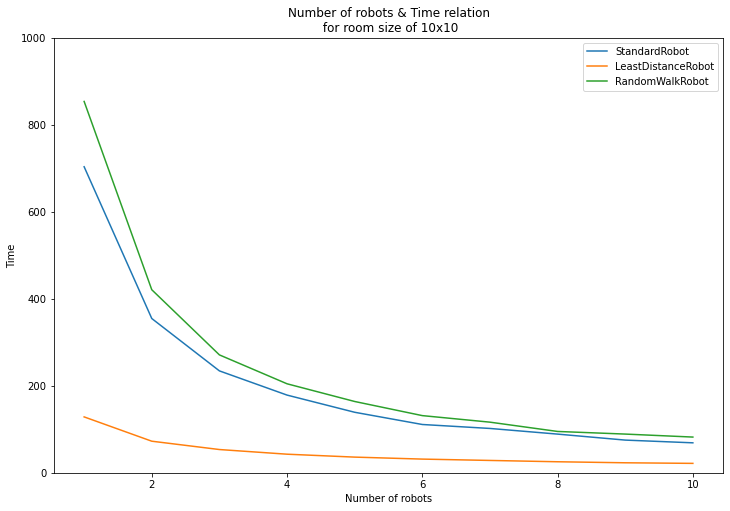

In [10]:
def timeNumberPlot(title, x_label, y_label, dim_length):
    """
    Plots the relation between the number of robots and the average time
    taken by different robots to clean a portion of the room.
    """
    pylab.figure(figsize=(12, 8))
    num_robot_range = range(1, 11)
    times1, times2, times3 = ([] for i in range(3))
    time_Robot_list = [times1, times2, times3]
    Robots = [StandardRobot, LeastDistanceRobot, RandomWalkRobot]
    for i in range(len(Robots)):
        for num_robots in num_robot_range:
            result = runSimulation(
                num_robots, 1.0, dim_length, dim_length, 1, 100, Robots[i])
            time_Robot_list[i].append(result[0])
    for time in time_Robot_list:
        pylab.plot(num_robot_range, time)
    pylab.title(title+f"\n for room size of {dim_length}x{dim_length}")
    pylab.legend(('StandardRobot', 'LeastDistanceRobot', 'RandomWalkRobot'))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.ylim(0, 1000)
    pylab.show()
    
timeNumberPlot('Number of robots & Time relation', 'Number of robots', 'Time', 10)

It is obvious from the graph, that as the number of robots increases, the average time taken to clean the room decreases exponentially. And that applies to the three agents, with the LeastDistanceRobot outperforming the others.

### Does the aspect ratio of the room have and effect on the robots?

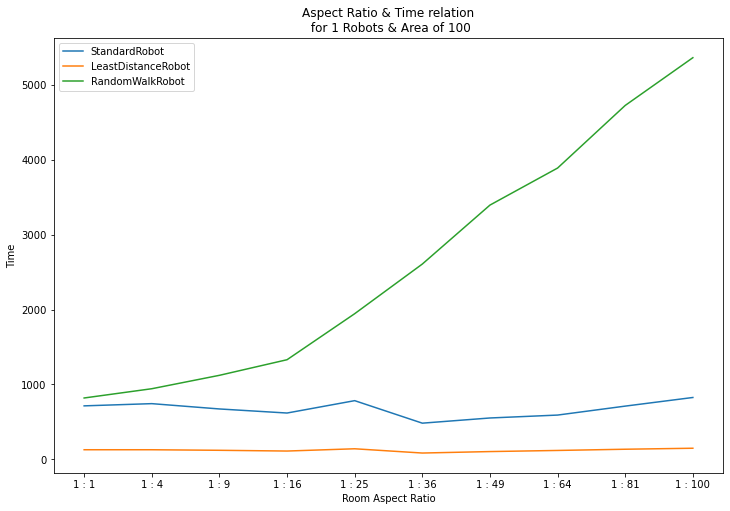

In [11]:
def timeAspectRatioPlot(title, x_label, y_label, area, num_robots):
    """
    Plots the relation between the aspect ratio of a room and
    the average time taken by different robots to clean the room.
    """
    pylab.figure(figsize=(12, 8))
    aspect_ratios = []
    times1, times2, times3 = ([] for i in range(3))
    time_Robot_list = [times1, times2, times3]
    Robots = [StandardRobot, LeastDistanceRobot, RandomWalkRobot]
    start = math.sqrt(area)
    aspect_dim_list = []
    for dim in range(1, 11):
        aspect_dim_list.append(start*dim)
    for width in aspect_dim_list:
        height = area / width
        aspect_ratios.append(f"1 : {int(width/height)}")
        for i in range(len(Robots)):
            result = runSimulation(
                num_robots, 1.0, int(width), int(height), 1, 100, Robots[i])
            time_Robot_list[i].append(result[0])
    for time in time_Robot_list:
        pylab.plot(aspect_ratios, time)

    pylab.title(
        title+f"\n for {num_robots} Robots & Area of {area}")
    pylab.legend(('StandardRobot', 'LeastDistanceRobot', "RandomWalkRobot"))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()
    
timeAspectRatioPlot('Aspect Ratio & Time relation', 'Room Aspect Ratio', 'Time', 100, 1)

We notice from the graph that the RandomWalkRobot struggles as the aspect ratio keeps increasing. The other two agents seem to have a consistent performance, with the LeastDistanceRobot outperforming yet again.

### Which robots are most affected by increase in the room area?

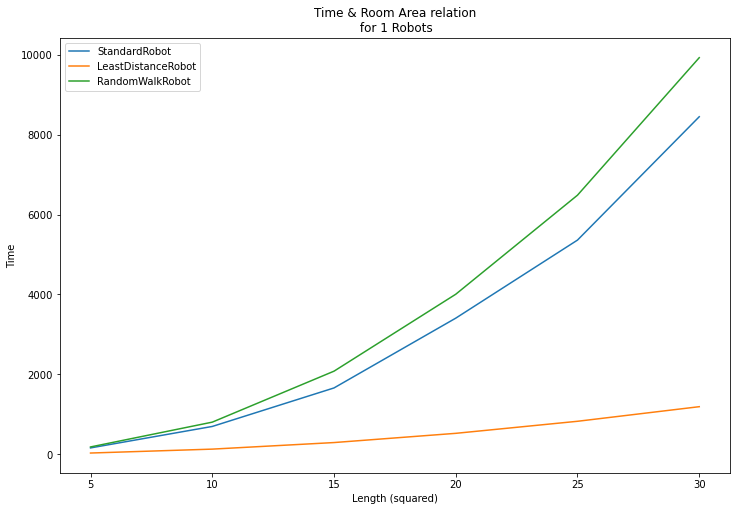

In [13]:
def timeAreaPlot(title, x_label, y_label, num_robots):
    """
    Plots the relation between the area of a room and the average time
    taken by different robots to clean a certain portion of that room.
    """
    pylab.figure(figsize=(12, 8))
    dim_length_range = range(5, 31, 5)
    times1, times2, times3 = ([] for i in range(3))
    time_Robot_list = [times1, times2, times3]
    Robots = [StandardRobot, LeastDistanceRobot, RandomWalkRobot]
    for i in range(len(Robots)):
        for dim_length in dim_length_range:
            result = runSimulation(
                num_robots, 1.0, dim_length, dim_length, 1, 100, Robots[i])
            time_Robot_list[i].append(result[0])
    for time in time_Robot_list:
        pylab.plot(dim_length_range, time)
    pylab.title(title+"\n for {0} Robots".format(num_robots))
    pylab.legend(('StandardRobot', 'LeastDistanceRobot', "RandomWalkRobot"))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()

timeAreaPlot("Time & Room Area relation", "Length (squared)", "Time", 1)

It is noticeable that the room area increase has a slight linear increase in the time of the LeastDistanceRobot, but has a significant quadratic increase in the time of the two other robots, which indicates that their algorithms do not scale well.

### Which robot has the most consistent behaviour?

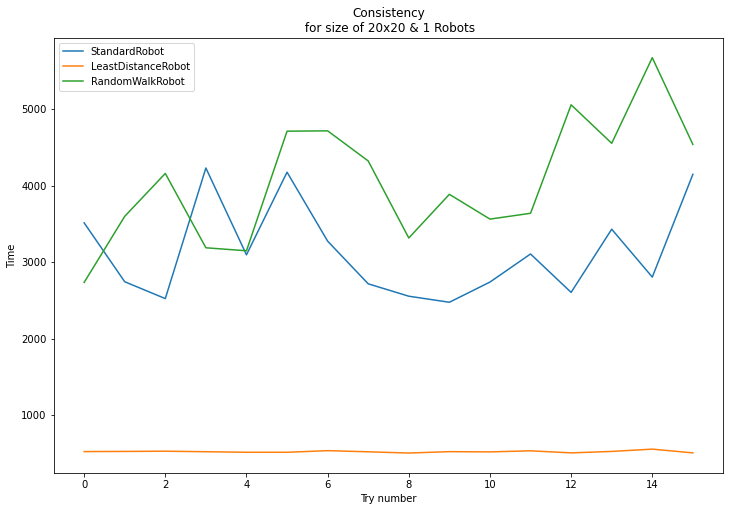

In [18]:
def consistencyPlot(title, x_label, y_label, dim_length, num_robots):
    """
    Performs the same exact experiment multiple of times
    for a robot or a number of robots and plots the outcomes of
    these experiments in terms of time taken for each individual
    experiment to measure the consistency of performance for various robots.
    """
    pylab.figure(figsize=(12, 8))
    try_num_range = range(16)
    times1, times2, times3 = ([] for i in range(3))
    time_Robot_list = [times1, times2, times3]
    Robots = [StandardRobot, LeastDistanceRobot, RandomWalkRobot]
    for i in range(len(Robots)):
        for try_num in try_num_range:
            result = runSimulation(
                num_robots, 1.0, dim_length, dim_length, 1, 1, Robots[i])
            time_Robot_list[i].append(result[0])
    for time in time_Robot_list:
        pylab.plot(try_num_range, time)
    pylab.title(
        title+"\n for size of {0}x{0} & {1} Robots".format(dim_length, num_robots))
    pylab.legend(('StandardRobot', 'LeastDistanceRobot', "RandomWalkRobot"))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()
    
consistencyPlot("Consistency", "Try number", "Time", 20, 1)

In a 20x20 room, the LeastDistanceRobot shows a consistent behaviour, while the two other robots have a significant variation in performance.

### How efficient is a group of LeastDistanceRobots working together?

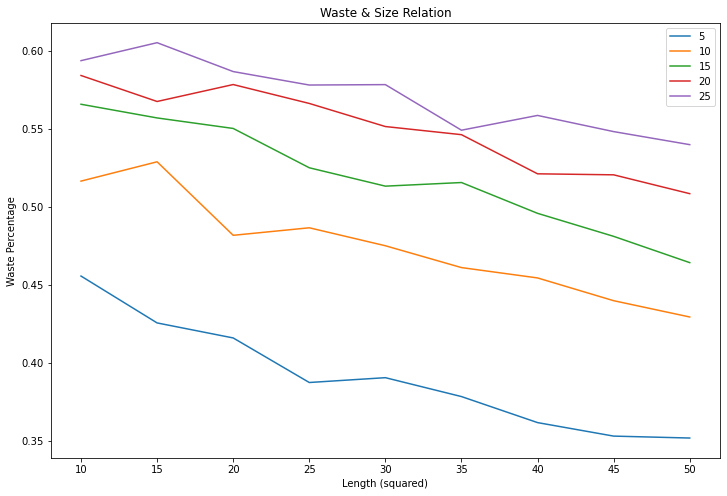

In [28]:
def wasteAreaNumberPlot(title, x_label, y_label):
    """
    Plots the relation between the waste percentage and the area of the
    room for a different number of robots,
    (each plotted individually)
    """
    pylab.figure(figsize=(12, 8))
    alist, blist, clist, dlist, elist = ([] for i in range(5))
    num_robots_list = [alist, blist, clist, dlist, elist]
    t1list, t2list, t3list, t4list, t5list = ([] for i in range(5))
    time_robots_list = [t1list, t2list, t3list, t4list, t5list]
    dim_length_range = range(10, 51, 5)
    num_robots_range = range(5, 26, 5)
    for dim_length in dim_length_range:
        for i in range(len(num_robots_list)):
            results = runSimulation(
                num_robots_range[i], 1.0, dim_length,
                dim_length, 1, 100, LeastDistanceRobot)
            num_robots_list[i].append(results[1]/results[0])
            time_robots_list[i].append(results[0])

    for i in range(len(num_robots_range)):
        pylab.plot(dim_length_range, num_robots_list[i])
    pylab.title(title)
    pylab.legend(('5', '10', "15", "20", "25"))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()
    
wasteAreaNumberPlot('Waste & Size Relation', 'Length (squared)', 'Waste Percentage')

It is obvious that the efficiency decreases a bit (waste increases) as the number of robots increases in the room, and there is a slight increase in efficiency as the room's area increases.